In [27]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline
            
import seaborn as sns

In [28]:
Train = pd.read_csv('train_data.csv')
Test = pd.read_csv('test_data.csv')
Vd = pd.read_csv('VariableDescription.csv')
Sample = pd.read_csv('sample_submission.csv')

In [29]:
Test_id = Test['Customer Id']

In [30]:
Train.drop(columns = 'Customer Id', inplace = True)
Test.drop(columns = 'Customer Id', inplace = True)

In [31]:
Test.shape

(3069, 12)

In [32]:
Sample.isnull().sum()

Customer Id    0
Claim          0
dtype: int64

In [33]:
Train.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


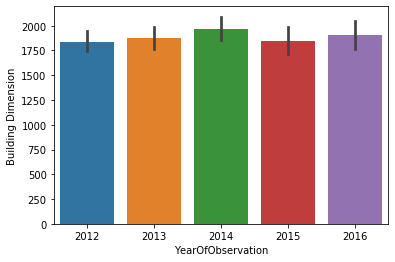

In [34]:
sns.barplot(x= 'YearOfObservation', y='Building Dimension', data=Train)

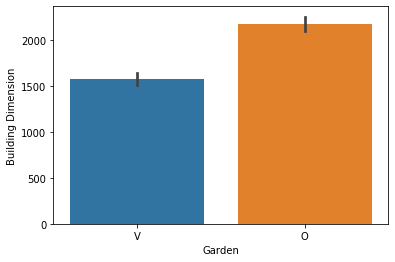

In [35]:
sns.barplot(x= 'Garden', y='Building Dimension', data=Train)

In [36]:
Train.drop(['Building_Painted', 'Geo_Code', 'Building_Fenced', 'Garden', 'NumberOfWindows'], axis = 1, inplace = True)

In [37]:
Test.drop(['Building_Painted', 'Geo_Code', 'Building_Fenced', 'Garden', 'NumberOfWindows'], axis = 1, inplace = True)

In [38]:
Train.head()

,YearOfObservation,Insured_Period,Residential,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Claim
0,2013,1.0,0,U,290.0,1,1960.0,0
1,2015,1.0,0,R,490.0,1,1850.0,0
2,2014,1.0,0,U,595.0,1,1960.0,0
3,2013,1.0,0,U,2840.0,1,1960.0,0
4,2014,1.0,0,R,680.0,1,1800.0,0


In [39]:
Test.head()

,YearOfObservation,Insured_Period,Residential,Settlement,Building Dimension,Building_Type,Date_of_Occupancy
0,2013,1.000000,0,R,300.0,1,1960.0
1,2016,0.997268,0,R,300.0,1,1960.0
2,2013,0.369863,0,U,790.0,1,1960.0
3,2014,1.000000,0,R,1405.0,1,2004.0
4,2016,1.000000,0,R,1405.0,1,2004.0


In [40]:
Vd

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not ..."
6,Garden,building has garden or not (V-has garden; O-no...
7,Settlement,Area where the building is located. (R- rural ...
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


In [41]:
Train.isnull().sum()

YearOfObservation       0
Insured_Period          0
Residential             0
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
Claim                   0
dtype: int64

In [42]:
Train.dtypes

YearOfObservation       int64
Insured_Period        float64
Residential             int64
Settlement             object
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
Claim                   int64
dtype: object

In [43]:
Cat_col = (Train.select_dtypes(include = 'object').columns)

In [44]:
Cat_col

Index(['Settlement'], dtype='object')

In [45]:
num_col = (Train.select_dtypes(exclude = 'object').columns)

In [46]:
num_col

Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy', 'Claim'],
      dtype='object')

In [47]:
Train.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [48]:
Train['Settlement'].value_counts()

R    3610
U    3550
Name: Settlement, dtype: int64

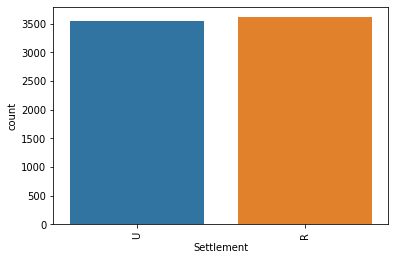

In [52]:
for col in Cat_col:
    fig = plt.figure()
    axis = fig.gca()
    sns.countplot(Train[col],ax = axis)
    plt.xticks(rotation = 90)

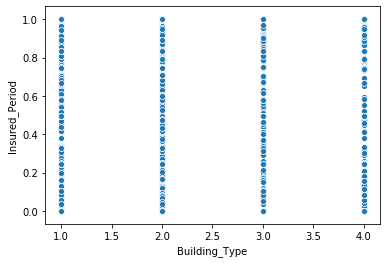

In [53]:
sns.scatterplot(x = 'Building_Type', y='Insured_Period', data = Train)

In [54]:
Train['YearOfObservation'] = 2019 - Train['YearOfObservation']
Test['YearOfObservation'] = 2019 - Test['YearOfObservation']

Train['Date_of_Occupancy'] = 2019 - Train['Date_of_Occupancy']
Test['Date_of_Occupancy'] = 2019 - Test['Date_of_Occupancy']


In [55]:
Train.head()

,YearOfObservation,Insured_Period,Residential,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Claim
0,2013,1.0,0,U,290.0,1,1960.0,0
1,2015,1.0,0,R,490.0,1,1850.0,0
2,2014,1.0,0,U,595.0,1,1960.0,0
3,2013,1.0,0,U,2840.0,1,1960.0,0
4,2014,1.0,0,R,680.0,1,1800.0,0


In [56]:
Train['Building Dimension'].value_counts

<bound method IndexOpsMixin.value_counts of 0        290.0
1        490.0
2        595.0
3       2840.0
4        680.0
5        535.0
6       2830.0
7       4952.0
8       2735.0
9        520.0
10       550.0
11       910.0
12       842.0
13       300.0
14       560.0
15      3326.0
16      3990.0
17      3990.0
18      2444.0
19      2444.0
20      1626.0
21      2400.0
22       250.0
23      2300.0
24       600.0
25      5439.0
26      5439.0
27      1100.0
28      1200.0
29       552.0
         ...  
7130       NaN
7131       NaN
7132       NaN
7133       NaN
7134       NaN
7135       NaN
7136       NaN
7137       NaN
7138       NaN
7139       NaN
7140       NaN
7141       NaN
7142       NaN
7143       NaN
7144       NaN
7145       NaN
7146       NaN
7147       NaN
7148       NaN
7149       NaN
7150       NaN
7151       NaN
7152       NaN
7153       NaN
7154       NaN
7155       NaN
7156       NaN
7157       NaN
7158       NaN
7159       NaN
Name: Building Dimension, Length: 7160, d

In [57]:
Train['Building Dimension'].fillna(value = Train['Building Dimension'].mean(), inplace = True)
Test['Building Dimension'].fillna(value = Test['Building Dimension'].mean(), inplace = True)

Train['Date_of_Occupancy'].fillna(value = Train['Date_of_Occupancy'].mean(), inplace = True)
Test['Date_of_Occupancy'].fillna(value = Test['Date_of_Occupancy'].mean(), inplace = True)

In [58]:
Train['Building Dimension'].value_counts

<bound method IndexOpsMixin.value_counts of 0        290.00000
1        490.00000
2        595.00000
3       2840.00000
4        680.00000
5        535.00000
6       2830.00000
7       4952.00000
8       2735.00000
9        520.00000
10       550.00000
11       910.00000
12       842.00000
13       300.00000
14       560.00000
15      3326.00000
16      3990.00000
17      3990.00000
18      2444.00000
19      2444.00000
20      1626.00000
21      2400.00000
22       250.00000
23      2300.00000
24       600.00000
25      5439.00000
26      5439.00000
27      1100.00000
28      1200.00000
29       552.00000
           ...    
7130    1883.72753
7131    1883.72753
7132    1883.72753
7133    1883.72753
7134    1883.72753
7135    1883.72753
7136    1883.72753
7137    1883.72753
7138    1883.72753
7139    1883.72753
7140    1883.72753
7141    1883.72753
7142    1883.72753
7143    1883.72753
7144    1883.72753
7145    1883.72753
7146    1883.72753
7147    1883.72753
7148    1883.72753
7149  

In [59]:
Test['Date_of_Occupancy'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1960.000000
1       1960.000000
2       1960.000000
3       2004.000000
4       2004.000000
5       1988.000000
6       1966.781717
7       1980.000000
8       1966.781717
9       1966.781717
10      1960.000000
11      1980.000000
12      1980.000000
13      1980.000000
14      2005.000000
15      2006.000000
16      1988.000000
17      1988.000000
18      1988.000000
19      1974.000000
20      1984.000000
21      1966.781717
22      1960.000000
23      1980.000000
24      1980.000000
25      1980.000000
26      1966.781717
27      1966.781717
28      1988.000000
29      1980.000000
           ...     
3039    1966.781717
3040    1966.781717
3041    1960.000000
3042    1966.781717
3043    1966.781717
3044    1966.781717
3045    1966.781717
3046    1966.781717
3047    1966.781717
3048    1966.781717
3049    1980.000000
3050    1966.781717
3051    1966.781717
3052    1980.000000
3053    1966.781717
3054    1966.781717
3055    1966.781

In [60]:
Train.isnull().sum()

YearOfObservation     0
Insured_Period        0
Residential           0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
Claim                 0
dtype: int64

In [61]:
#Train['Geo_Code'].fillna(value = Train['Geo_Code'].mode(), inplace = True)
#Test['Geo_Code'].fillna(value = Train['Geo_Code'].mode(), inplace = True)

In [62]:
#Train['Geo_Code']

In [63]:
Train.isnull().sum()

YearOfObservation     0
Insured_Period        0
Residential           0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
Claim                 0
dtype: int64

In [64]:
cat_col = [n for n in Train.columns if Train[n].dtypes == 'object']

cat_encode = []
for cat in cat_col:
    temp = len(Train[cat].unique())
    if temp > 4 :
        cat_encode.append(cat)

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
Joint_data = pd.concat([Train, Test], sort=False)

In [67]:
lb = LabelEncoder()

for col in cat_col:
    lb.fit(Joint_data[col])
    Joint_data[col] = lb.transform(Joint_data[col])

In [68]:
Train.shape

(7160, 8)

In [69]:
Test.shape

(3069, 7)

In [70]:
Test.dtypes

YearOfObservation       int64
Insured_Period        float64
Residential             int64
Settlement             object
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
dtype: object

In [71]:
Train = Joint_data[0:Train.shape[0]]
Train.shape

(7160, 8)

In [72]:
Train = Joint_data[0:7160]
Test = Joint_data[7160:]

print("shape of Train {}".format(Train.shape))
print("shape of Test {}".format(Test.shape))

shape of Train (7160, 8)
shape of Test (3069, 8)


In [73]:
y_target = Train['Claim']

Train.drop(columns = 'Claim', inplace  = True)
Test.drop(columns = 'Claim', inplace  = True)

/home/cadeton/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
sc = StandardScaler()
sc.fit(Train)

Train = sc.transform(Train)
Test = sc.transform(Test)

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train,X_test,y_train,y_test = train_test_split(Train,y_target, test_size = 0.3, random_state = 0)

In [78]:
from sklearn.metrics import roc_auc_score

## Modelling

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [80]:
dr_model = DecisionTreeClassifier(random_state= 1, class_weight=None, presort=False,max_depth=3, min_samples_split=3)
dr_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [81]:
pred = dr_model.predict(X_test)

In [82]:
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [83]:
roc_auc_score(pred, y_test)

0.7139502319204177

In [84]:
kn_model = KNeighborsClassifier(n_neighbors=32,leaf_size=30, n_jobs=2)
kn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=2, n_neighbors=32, p=2,
                     weights='uniform')

In [85]:
pred = kn_model.predict(X_test)

In [86]:
pred

array([1., 0., 0., ..., 1., 0., 0.])

In [87]:
roc_auc_score(pred, y_test)

0.6989217973807016

In [88]:
sc = StandardScaler()
sc.fit(Train)

Train = sc.transform(Train)
Test = sc.transform(Test)

In [89]:
Rr_model = RandomForestClassifier(min_weight_fraction_leaf = 0, n_estimators=13, max_depth=10, min_samples_split=10, verbose=0)
Rr_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0, n_estimators=13, n_jobs=None,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [90]:
pred = Rr_model.predict(X_test)

In [91]:
pred

array([1., 0., 0., ..., 0., 0., 0.])

In [92]:
roc_auc_score(pred, y_test)

0.6873310727799892

In [93]:
#import catboost as cb

In [94]:
#catb = cb.CatBoostClassifier(iterations=1000, use_best_model=True, eval_metric='F1', random_seed=1)
#catb.fit(X_train, y_train, eval_set = (X_test, y_test))

In [95]:
#cb_model = cb.CatBoostClassifier(iterations=762, random_seed=1, silent=True)
#cb_model.fit(X_train, y_train)
#cb_pred = cb_model.predict(X_test)
#roc_auc_score(cb_pred, y_test)

In [96]:
final_pred = kn_model.predict(Test)

In [97]:
final_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [98]:
Sample.head()

,Customer Id,Claim
0,H0,1
1,H10000,1
2,H10001,1
3,H10002,1
4,H10003,1


In [99]:
len(final_pred)

3069

In [100]:
Test = pd.read_csv('test_data.csv')

In [101]:
Sam = pd.DataFrame(Test['Customer Id'])
Sam['Claim'] = final_pred

In [102]:
Sam.head()

,Customer Id,Claim
0,H11920,0.0
1,H11921,0.0
2,H9805,0.0
3,H7493,0.0
4,H7494,0.0


SyntaxError: unexpected EOF while parsing (<ipython-input-103-7e305131373b>, line 1)

In [175]:
Sam['Claim'] = Sam['Claim'].astype("int64")

In [176]:
Sam.to_csv("sub10.csv", index=False)

In [177]:
Sam.head() 

,Customer Id,Claim
0,H11920,0
1,H11921,0
2,H9805,0
3,H7493,0
4,H7494,0


In [78]:
#Test_id

In [327]:
#Sample.Claim.value_counts()